<a href="https://colab.research.google.com/github/shamreen20/Learn-Basic-ML/blob/master/HyperParameter_for_bank_Churn_modelling_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/My Drive/datasets_13831_18644_Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
corr_mat = df.corr()

In [6]:
corr_mat.index

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

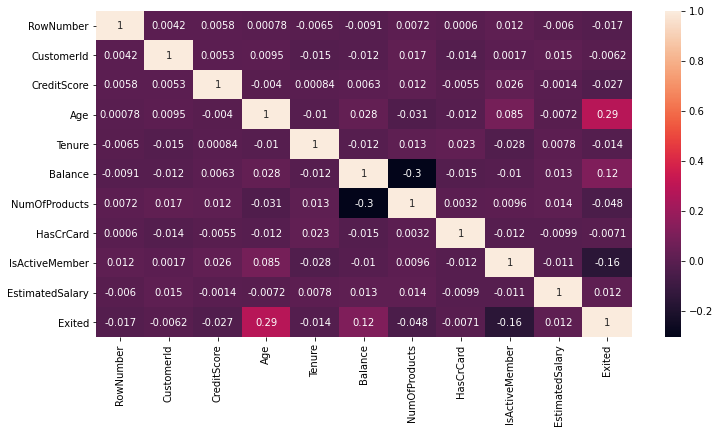

In [10]:
top_corr_features = corr_mat.index
plt.figure(figsize=(12,6))
sns.heatmap(df[top_corr_features].corr(), annot=True)

**Get dependent and independant feature**

In [11]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [12]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [13]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [14]:
gender = pd.get_dummies(X["Gender"], drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [15]:
X = X.drop(["Geography", "Gender"], axis=1)
X = pd.concat([X,geography,gender], axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


**Hyper parameter Optimization**

In [16]:
params = {'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
          'max_depth': [3,4,5,6,8,10,12,15],
          'min_child_weight': [1,3,5,7],
          'gamma': [0.0,0.1,0.2,0.3,0.4,0.5],
          'colsample_btree': [0.3,0.4,0.5,0.7]}

# HyperParameter Optimization using Randomized searchCV

In [21]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [18]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [19]:
classifier = xgboost. XGBClassifier()

In [22]:
random_search = RandomizedSearchCV( classifier, param_distributions = params, n_iter=5, scoring = 'roc_auc', n_jobs = -1, cv=5, verbose=3)

In [23]:
from datetime import datetime

In [24]:
start_time = timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   26.5s finished



 Time taken: 0 hours 0 minutes and 27.05 seconds.


In [25]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=0.3,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.4, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
random_search.best_params_

{'colsample_btree': 0.3,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3}

In [27]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=0.3,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0.4, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
score = cross_val_score(classifier, X, y, cv=10)

In [30]:
score

array([0.879, 0.861, 0.874, 0.864, 0.862, 0.853, 0.862, 0.882, 0.851,
       0.858])

In [31]:
score.mean()

0.8645999999999999